# Worksheet 15

Name: Shu Xing
UID: U97658230

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

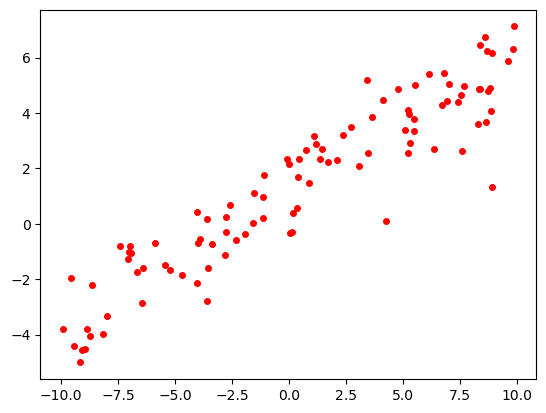

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , 0.5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

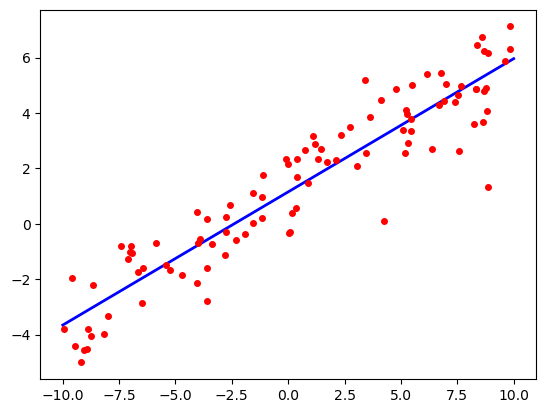

In [2]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ylin)

xplot = np.linspace(-10,10,50)
yestplot = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate of beta represents the coefficients of the linear regression model that best fits the data based on the least squares method. It tells us how much the Y variable changes for a one-unit increase in the X variable, taking into account the noise in the data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

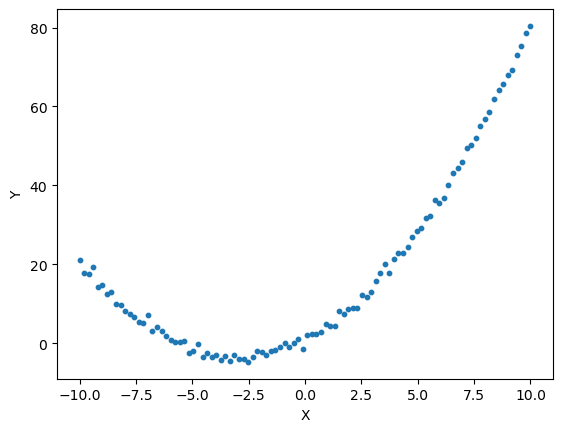

In [3]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([1, 3, 0.5])

x = np.linspace(-10, 10, 100)


eps = np.random.randn(100)
y = line[0] + (line[1] * x) + (line[2] * x**2) + eps

plt.scatter(x, y, s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


e) Plot the least squares estimate line through the scatter plot.

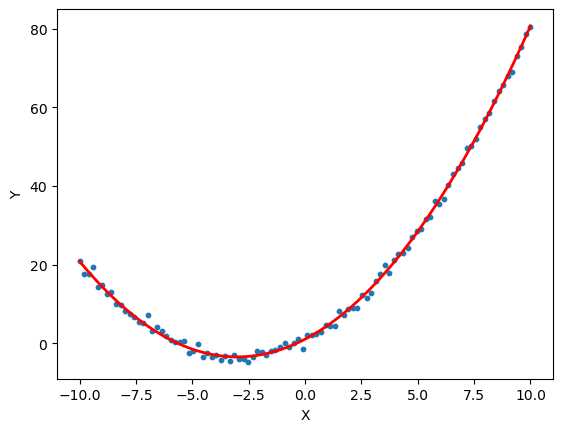

In [4]:
intercept = np.ones((x.shape[0], 1))
X = np.concatenate((intercept, x.reshape(-1, 1), (x**2).reshape(-1, 1)), axis=1)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Generate points to plot the least squares estimate line
xplot = np.linspace(-10, 10, 100)
yplot = beta[0] + beta[1] * xplot + beta[2] * xplot**2

# Plot the dataset and the least squares estimate line
plt.scatter(x, y, s=10)
plt.plot(xplot, yplot, 'r-', lw=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Since there is some randomness involved in generating the data and fitting the model, the estimated values may not be exactly the same as the true values.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

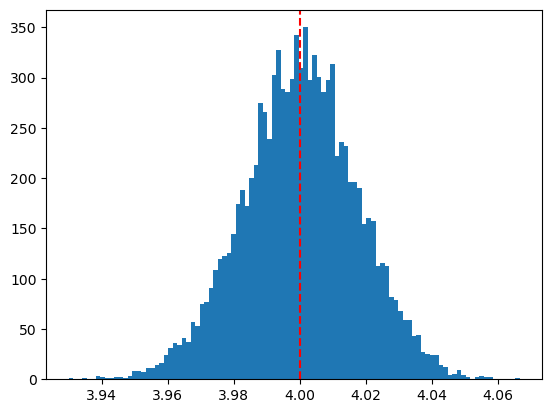

In [7]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 3,4 ])
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + true_beta[1] * xlin + np.random.randn(100)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T @X)@X.T @ylin )

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()